# Running MetaPhlAn2 and HUMAnN2

## 1. Download a dataset from metaanalysis

In [ ]:
prefetch SRR5050591

SRR5050591.sra downloaded to /home/jocelyn/ncbi/public/sra

## 2. Split files into fastq format

In [ ]:
fastq-dump SRR5050591.sra --split-files --gzip -I -O /home/jocelyn/metaphlan2

## 3. Run MetaPhlAn2

In [ ]:
#Make sure that bowtie2 and other apps are executable from PATH

In [ ]:
vi ~/.bashrc

In [ ]:
#add export PATH=$PATH:/APPS/bowtie2 to the file
#to exit, type ":" then enter

In [ ]:
/APPS/metaphlan2/metaphlan2.py /home/jocelyn/metaphlan2/SRR5050591_1.fastq --mpa_phl home/jocelyn/metaphlan2/db_v20/mpa_v20_m200.pkl --bowtie2db /home/jocelyn/metaphlan2/db_v20/mpa_v20_m200 --input_type fastq > SRR5050591_1.txt

In [ ]:
/APPS/metaphlan2/metaphlan2.py /home/jocelyn/metaphlan2/SRR5050591_2.fastq --mpa_pkl /home/jocelyn/metaphlan2/db_v20/mpa_v20_m200.pkl --bowtie2db /home/jocelyn/metaphlan2/db_v20/mpa_v20_m200 --input_type fastq > SRR5050591_2.txt

In [ ]:
#this took about an hour

In [ ]:
#Merge the 2 tables together

In [ ]:
/APPS/metaphlan2/utils/merge_metaphlan_tables.py *.txt > merged_tables.txt

In [ ]:
#edit file to keep on genus and species

In [ ]:
grep -E "(s__)|(^ID)" merged_tables.txt | grep -v "t__" | sed 's/^.*s__//g' > merged_abundance_table_species.txt

## 4. Create heatmap with hclust2

In [ ]:
APPS/metaphlan2/utils/hclust2/hclust2.py -i merged_abundance_table_species.txt -o merged_abundance_species.png --ftop 25 --f_dist_f braycurtis --s_dist_f braycurtis --cell_aspect_ratio 0.5 -l --flabel_size 6 --slabel_size 6 --max_flabel_len 100 --max_slabel_len 100 --minv 0.1 --dpi 300

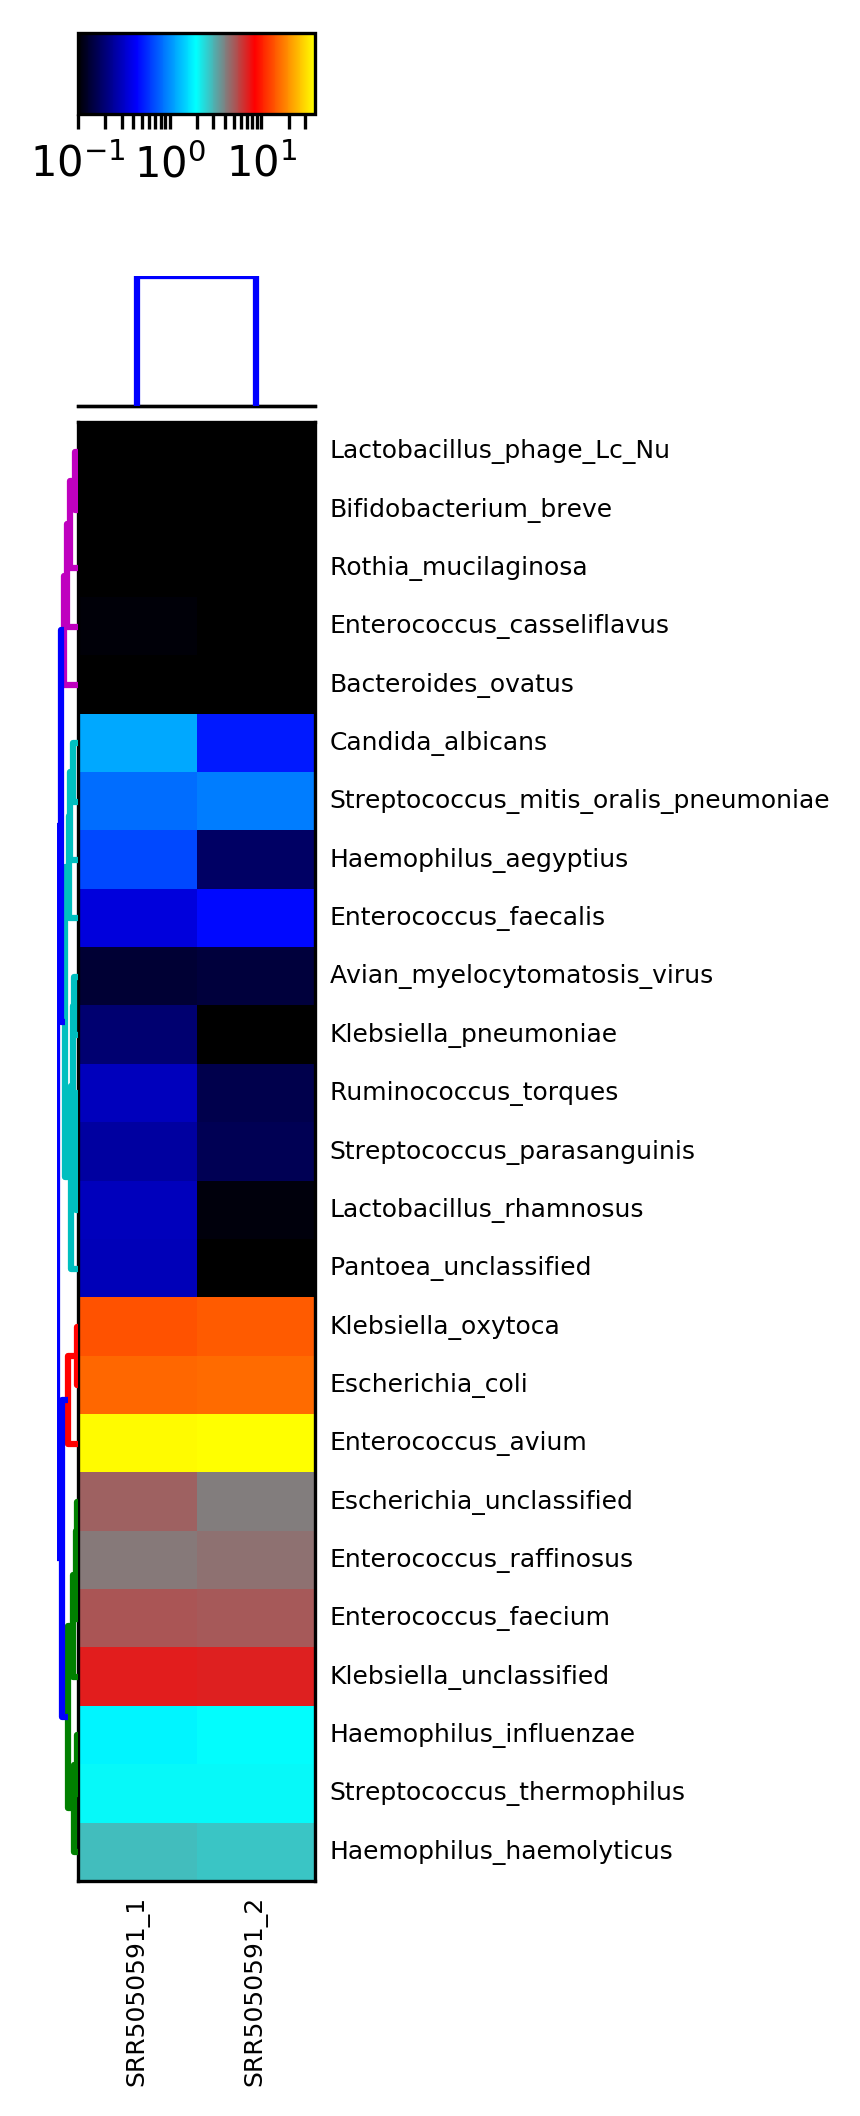

In [3]:
from IPython.display import Image, display
display(Image(filename='merged_abundance_species.png', embed=True))

## 5. Create cladogram using GraPhlAn

In [ ]:
/APPS/metaphlan2/utils/export2graphlan/export2graphlan.py --skip_rows 1,2 -i merged_tables.txt --tree merged_abundance.tree.txt --annotation merged_abundance.annot.txt --most_abundant 100 --abundance_threshold 1 --least_biomarkers 10 --annotations 5,6 --external_annotations 7 --min_clade_size 1 

In [ ]:
#output files:
merged_abundance.annot.txt
merged_abundance.tree.txt

In [ ]:
/APPS/graphlan/graphlan_annotate.py --annot merged_abundance.annot.txt merged_abundance.tree.txt merged_abundance.xml

In [ ]:
/APPS/graphlan/graphlan.py --dpi 300 merged_abundance.xml merged_abundance.png --external_legends

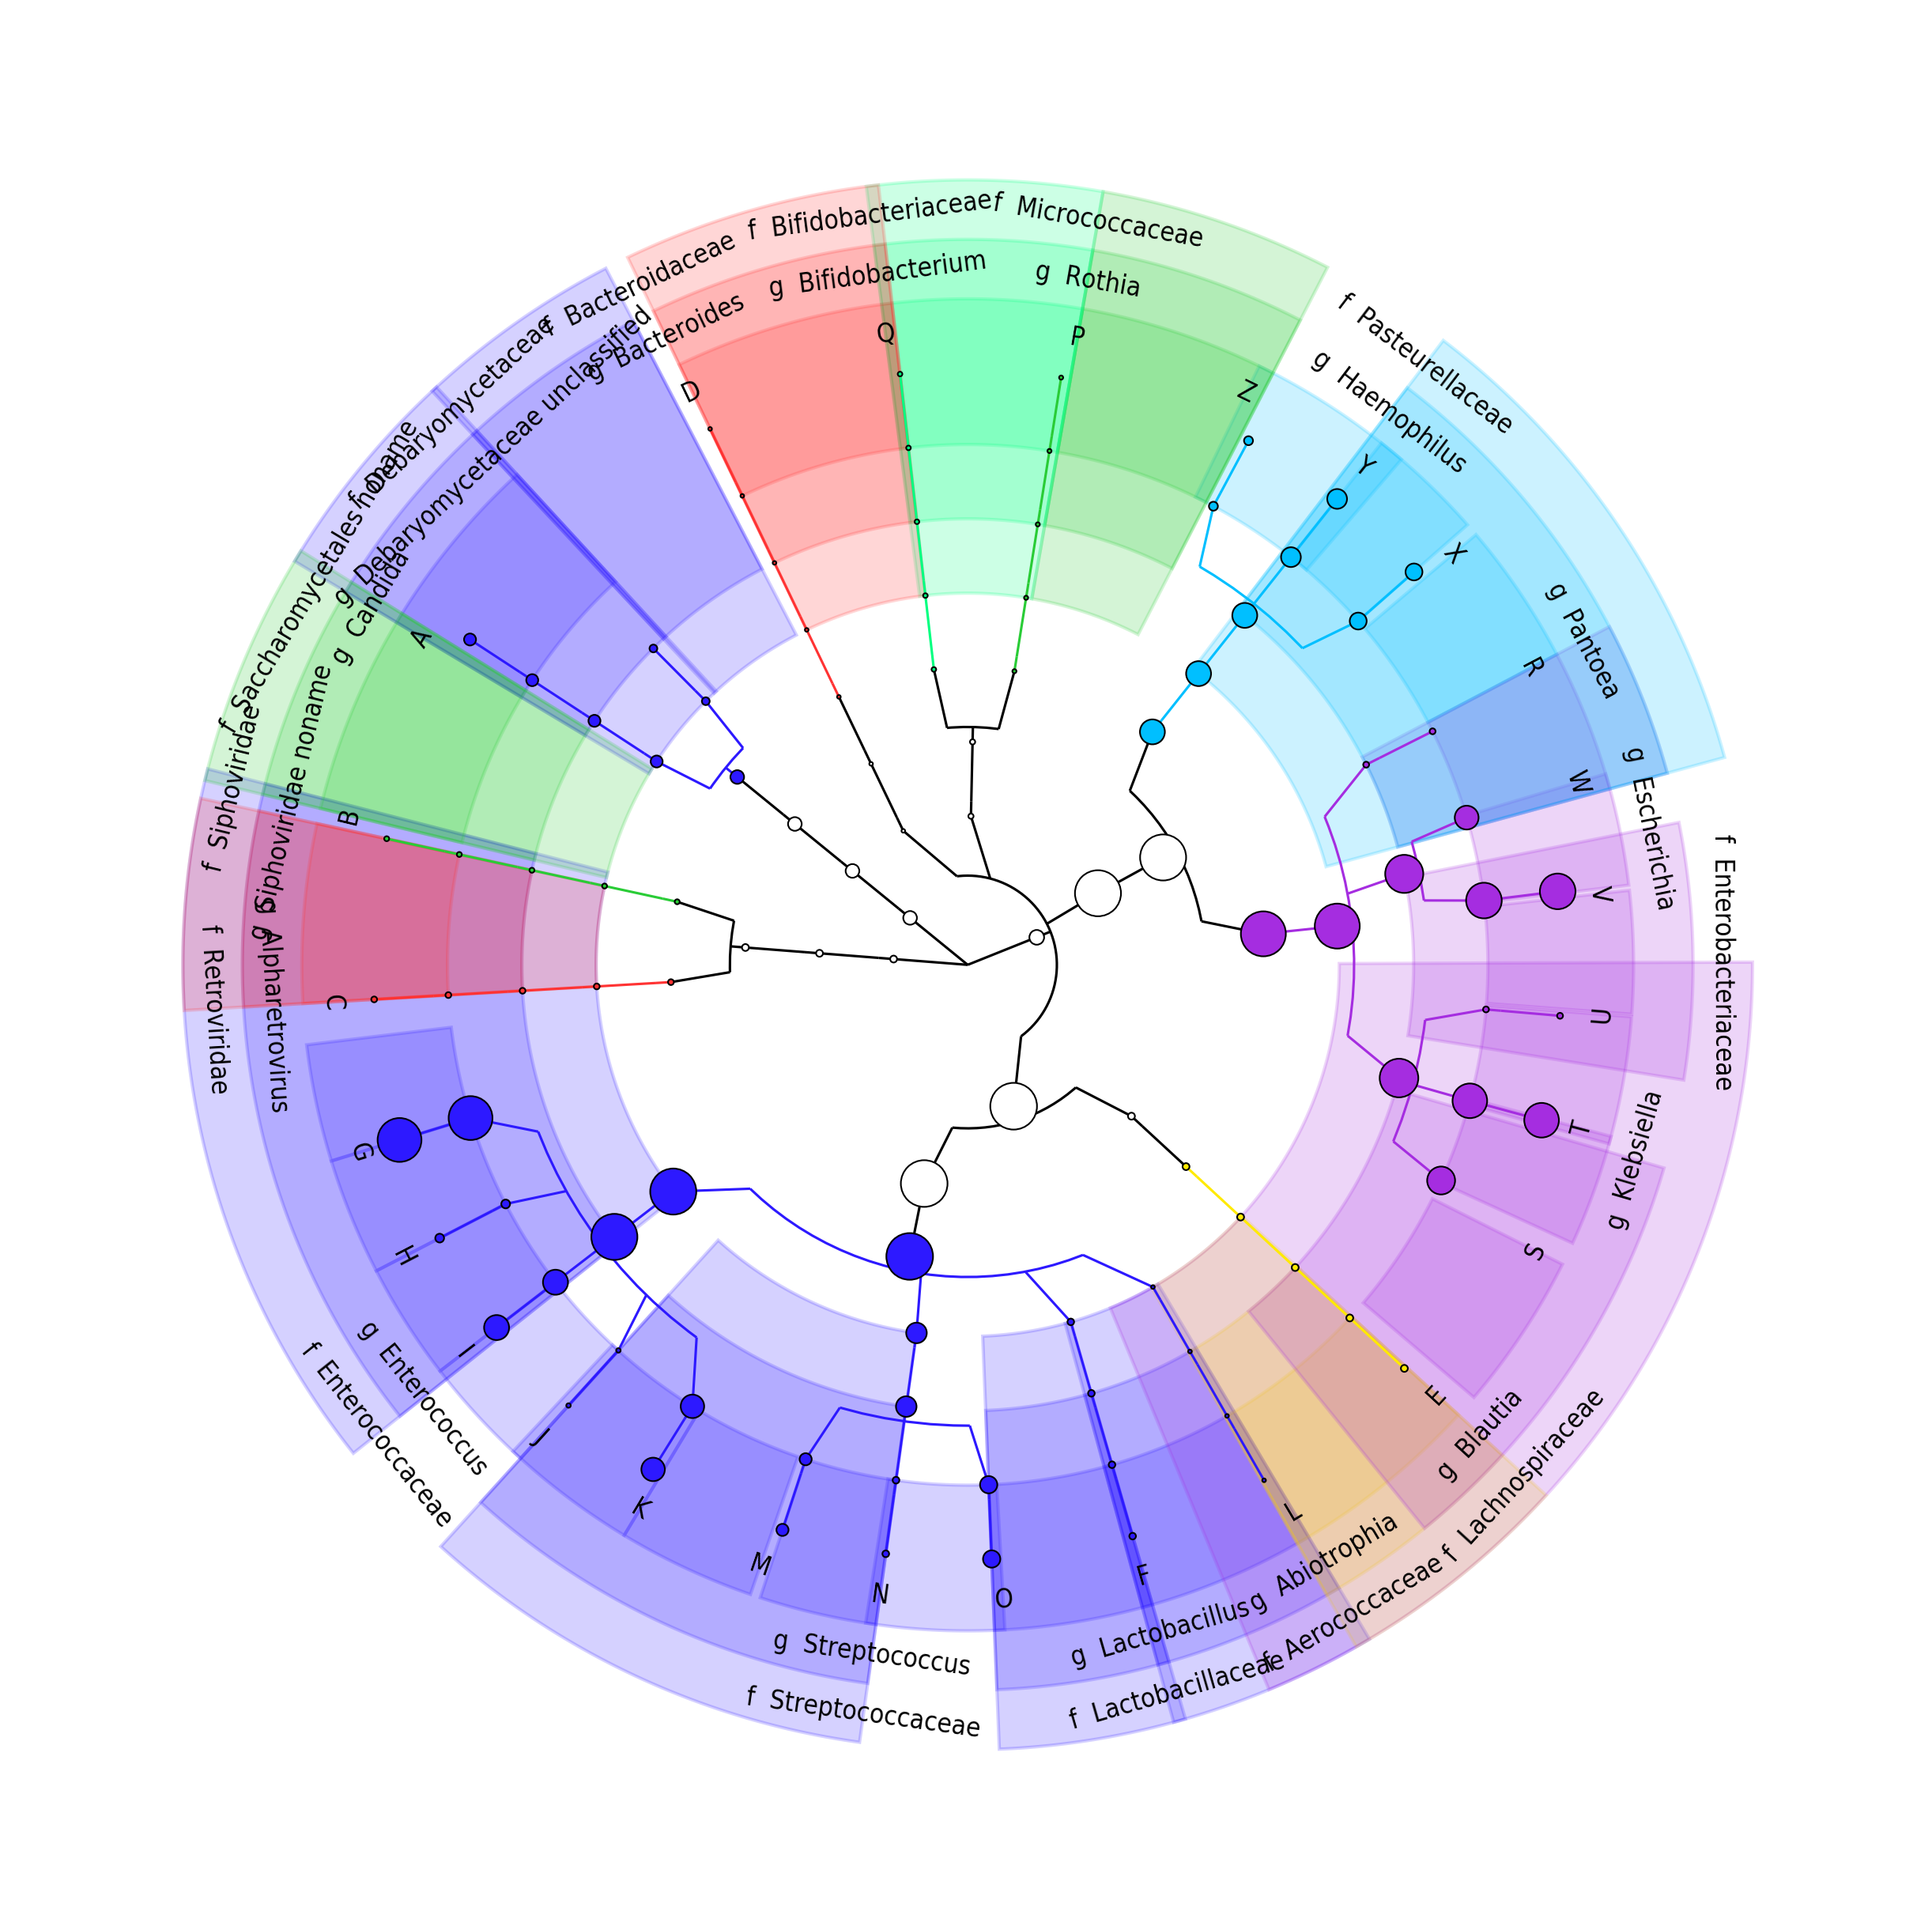

In [4]:
from IPython.display import Image, display
display(Image(filename='merged_abundance.png', embed=True))

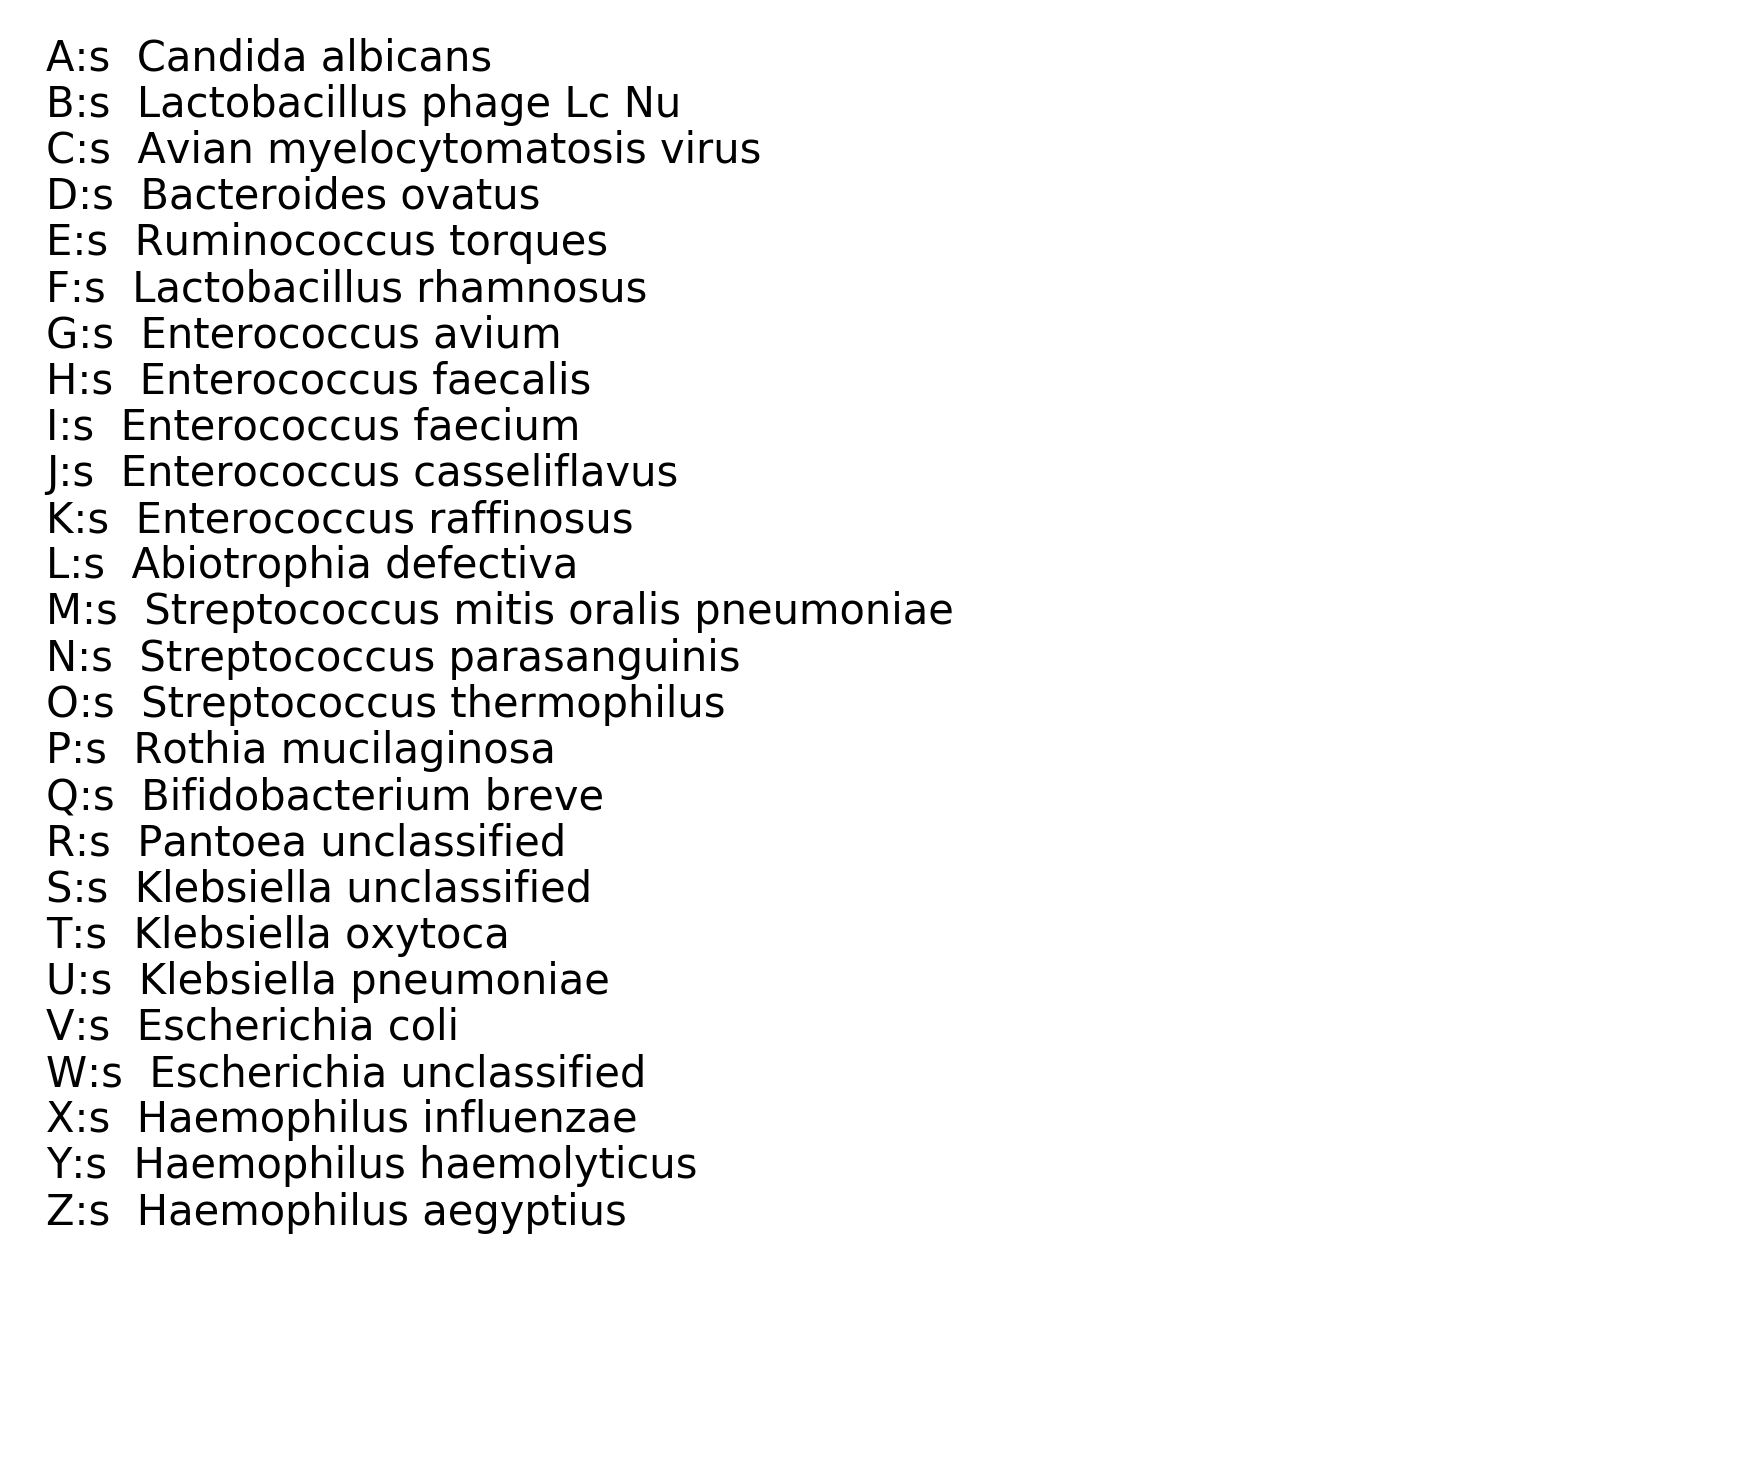

In [5]:
from IPython.display import Image, display
display(Image(filename='merged_abundance_annot.png', embed=True))

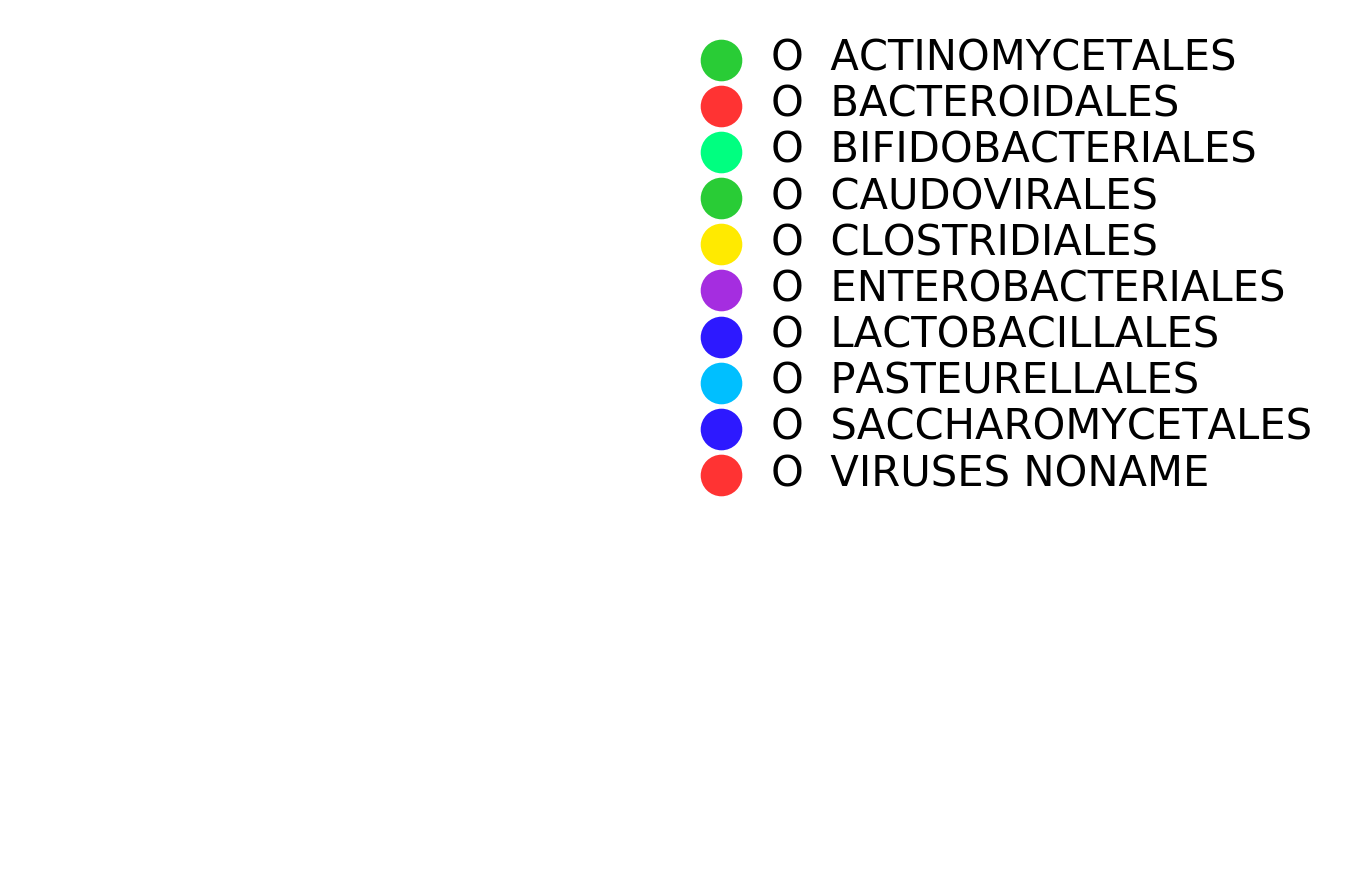

In [6]:
from IPython.display import Image, display
display(Image(filename='merged_abundance_legend.png', embed=True))